In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mplfinance as mfp
import seaborn as sns
import statistics as stats
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [2]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.7 MB/s eta 0:00:00


In [7]:
df = pd.read_csv("/content/sample_data/Accenture_stock_history.csv", parse_dates = ["Date"])
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2001-07-19,11.234038,11.375393,11.159640,11.286116,34994300,0.0,0
1,2001-07-20,11.196839,11.196839,11.010845,11.167080,9238500,0.0,0
2,2001-07-23,11.159637,11.167077,10.824848,11.159637,7501000,0.0,0
3,2001-07-24,11.122439,11.137319,10.936445,11.055481,3537300,0.0,0
4,2001-07-25,10.936445,11.122439,10.899246,11.122439,4208100,0.0,0
...,...,...,...,...,...,...,...,...
5077,2021-09-23,337.619995,344.739990,337.130005,343.000000,4543400,0.0,0
5078,2021-09-24,340.679993,342.880005,337.720001,339.230011,2035900,0.0,0
5079,2021-09-27,337.519989,337.720001,333.079987,334.510010,2025300,0.0,0
5080,2021-09-28,331.559998,332.019989,323.859985,324.209992,2300500,0.0,0


In [17]:
df
df2 = df.copy().reset_index()
df2.set_index("index", inplace = True)
df2["Difference"] = df2["Close"] - df2["Open"]
df2.drop(labels = ["Dividends", "Stock Splits"], axis = 1, inplace = True)
df2["Tomorrow"] = df2["Close"].shift(-1)
df2["target"] = (df2["Close"] < df2["Tomorrow"]).astype(int)
df2["Year"] = df2["Date"].dt.year
df2["Month"] = df2["Date"].dt.month
df2["Tomorrow"].fillna(0, inplace = True)
df2

,Date,Open,High,Low,Close,Volume,Difference,Tomorrow,target,Year,Month
index,,,,,,,,,,,
0,2001-07-19,11.234038,11.375393,11.159640,11.286116,34994300,0.052078,11.167080,0,2001,7
1,2001-07-20,11.196839,11.196839,11.010845,11.167080,9238500,-0.029759,11.159637,0,2001,7
2,2001-07-23,11.159637,11.167077,10.824848,11.159637,7501000,0.000000,11.055481,0,2001,7
3,2001-07-24,11.122439,11.137319,10.936445,11.055481,3537300,-0.066958,11.122439,1,2001,7
4,2001-07-25,10.936445,11.122439,10.899246,11.122439,4208100,0.185994,10.787649,0,2001,7
...,...,...,...,...,...,...,...,...,...,...,...
5077,2021-09-23,337.619995,344.739990,337.130005,343.000000,4543400,5.380005,339.230011,0,2021,9
5078,2021-09-24,340.679993,342.880005,337.720001,339.230011,2035900,-1.449982,334.510010,0,2021,9
5079,2021-09-27,337.519989,337.720001,333.079987,334.510010,2025300,-3.009979,324.209992,0,2021,9


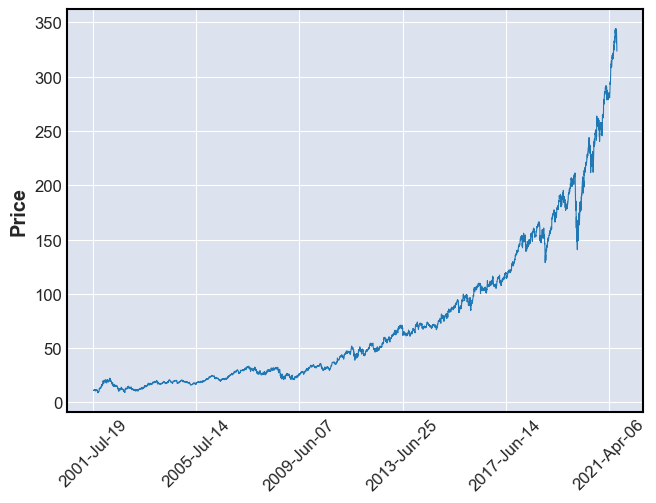

In [ ]:
mfp.plot(df, type = "line")

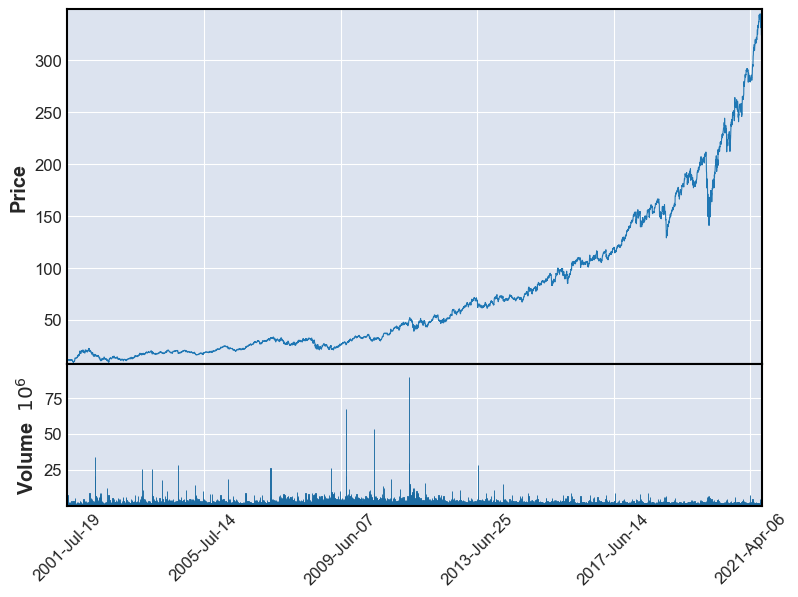

In [ ]:
mfp.plot(df, type = "line", volume = True, tight_layout = True)

C:\Users\Carlito\AppData\Local\Temp\ipykernel_13704\3101035155.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  mfp.plot(df["2021-01": "2021-12"], type = "candle", volume = True, mav=(20), tight_layout= True, style = 'blueskies')


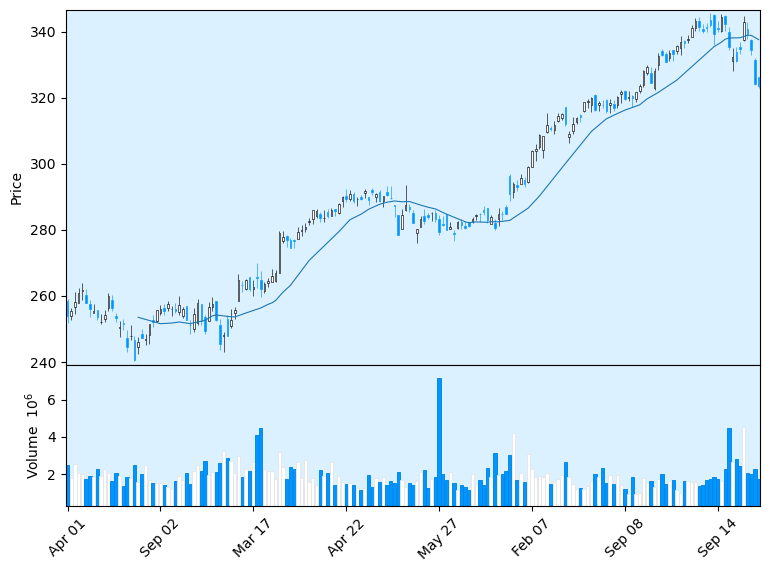

In [ ]:
mfp.plot(df["2021-01": "2021-12"], type = "candle", volume = True, mav=(20), tight_layout= True, style = 'blueskies')

C:\Users\Carlito\AppData\Local\Temp\ipykernel_13704\3428908676.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  mfp.plot(df["2020-01": "2020-12"], type = "candle", volume = True, mav = (20), tight_layout= True, style = "blueskies")


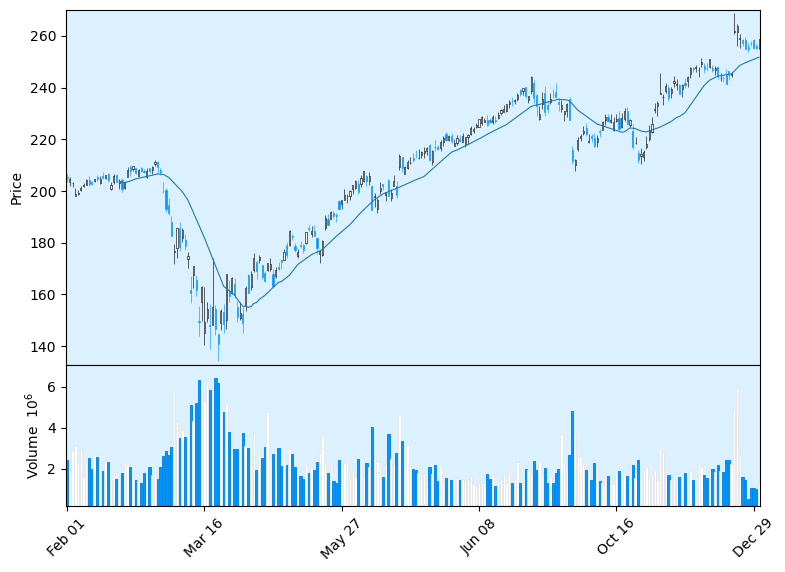

In [ ]:
mfp.plot(df["2020-01": "2020-12"], type = "candle", volume = True, mav = (20), tight_layout= True, style = "blueskies")

<AxesSubplot:xlabel='Date', ylabel='Difference'>

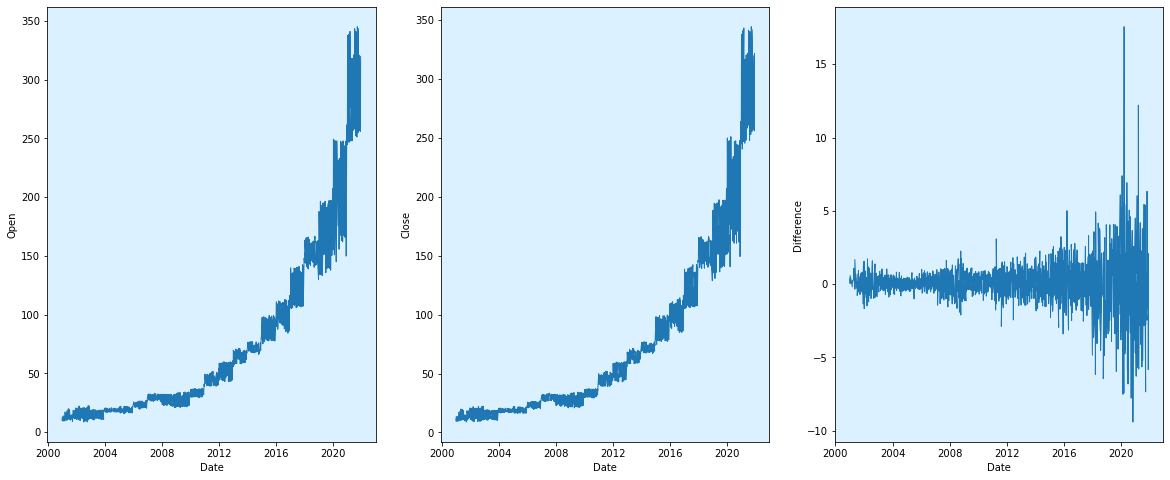

In [ ]:
fig, axes = plt.subplots(1,3, figsize = (20, 8))
sns.lineplot(data = df2, x= "Date", y = "Open", ax = axes[0])
sns.lineplot(data = df2, x = 'Date', y = "Close", ax = axes[1])
sns.lineplot(data = df2, x = "Date", y = "Difference", ax = axes[2])

(-5.0, 5.0)

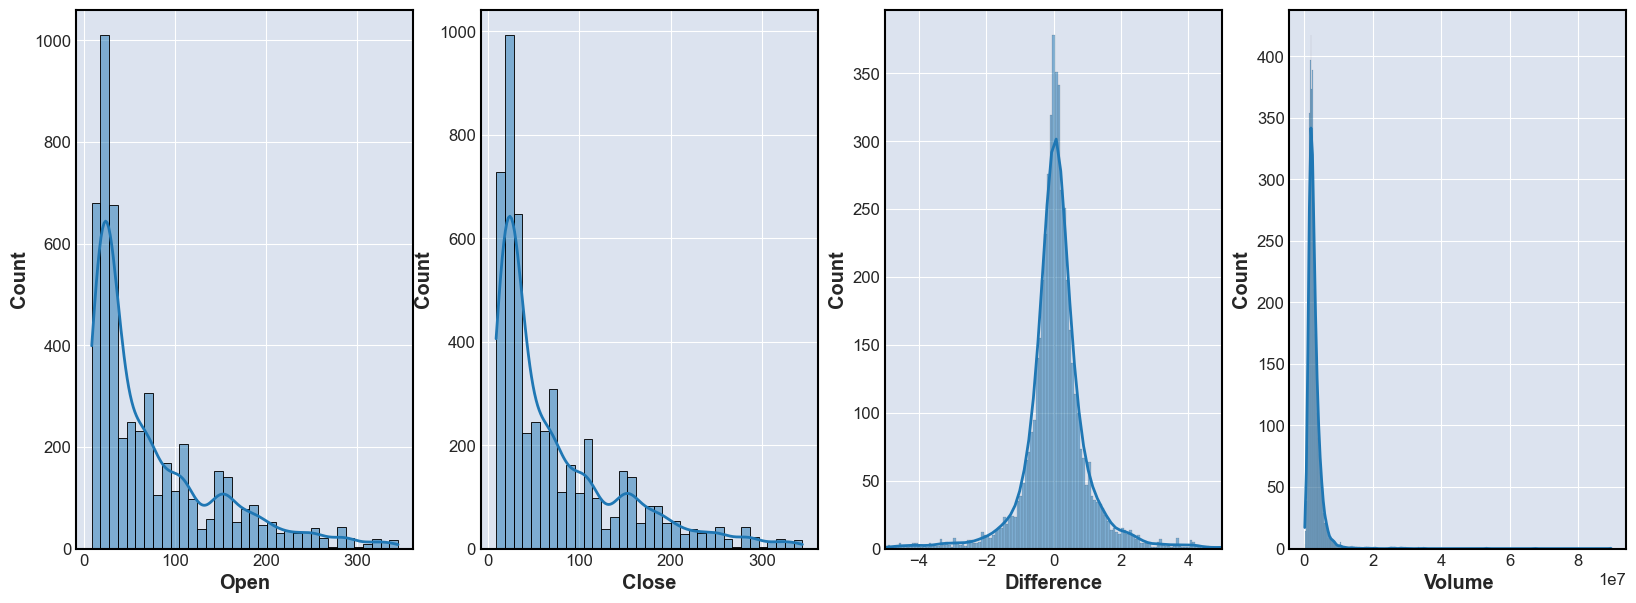

In [ ]:
fig, axes = plt.subplots(1,4, figsize = (20, 7))
ax1 = sns.histplot(data = df2, x = "Open", kde = True, ax = axes[0])
ax2 = sns.histplot(data = df2, x = "Close", kde = True, ax = axes[1])
ax3 = sns.histplot(data = df2, x = 'Difference', kde = True, ax = axes[2])
ax4 = sns.histplot(data = df2, x = "Volume", kde = True)
ax3.set_xlim([-5, 5])


<AxesSubplot:xlabel='Low', ylabel='Count'>

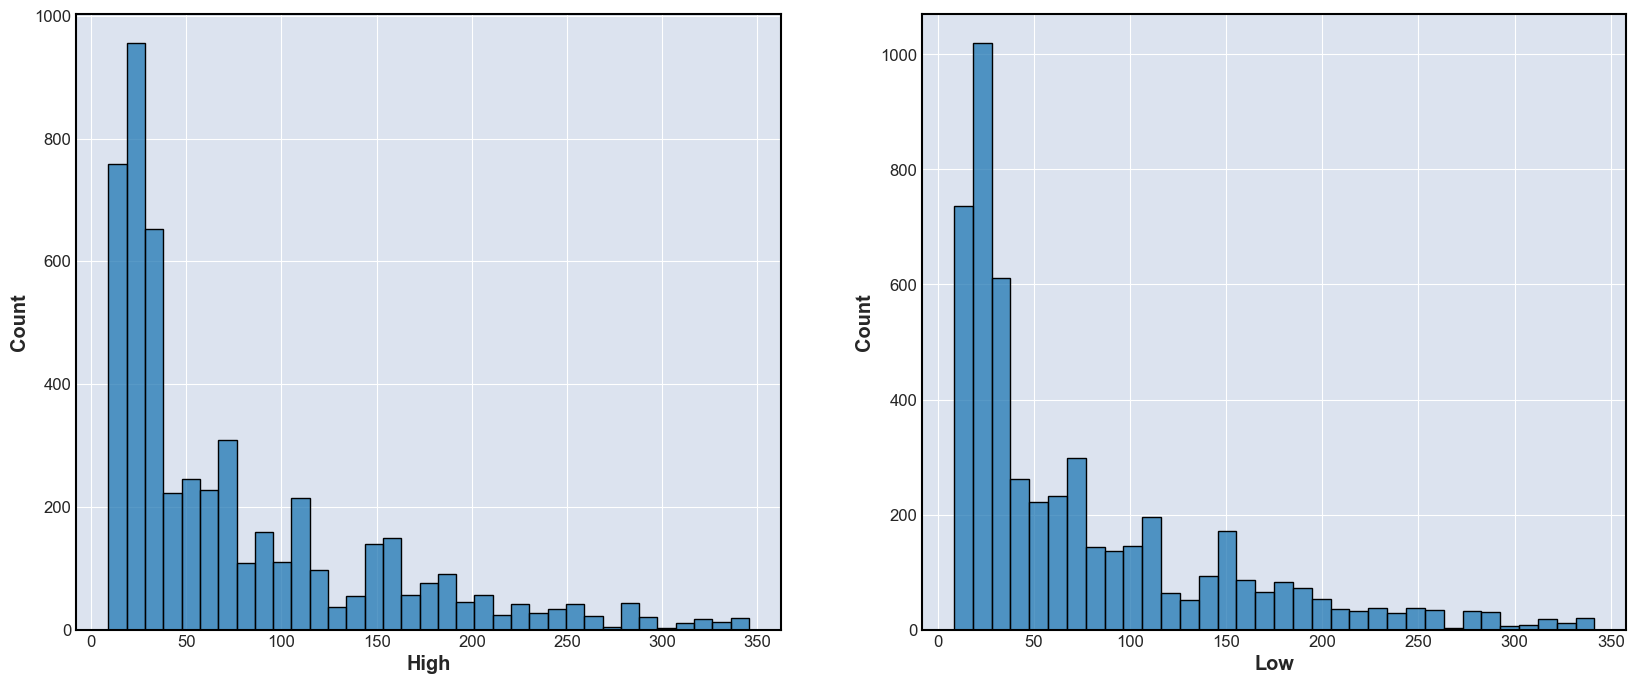

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (20, 8))
sns.histplot(data = df2, x = "High", ax = axes[0])
sns.histplot(data = df2, x = "Low", ax = axes[1])

<AxesSubplot:xlabel='Year', ylabel='Difference'>

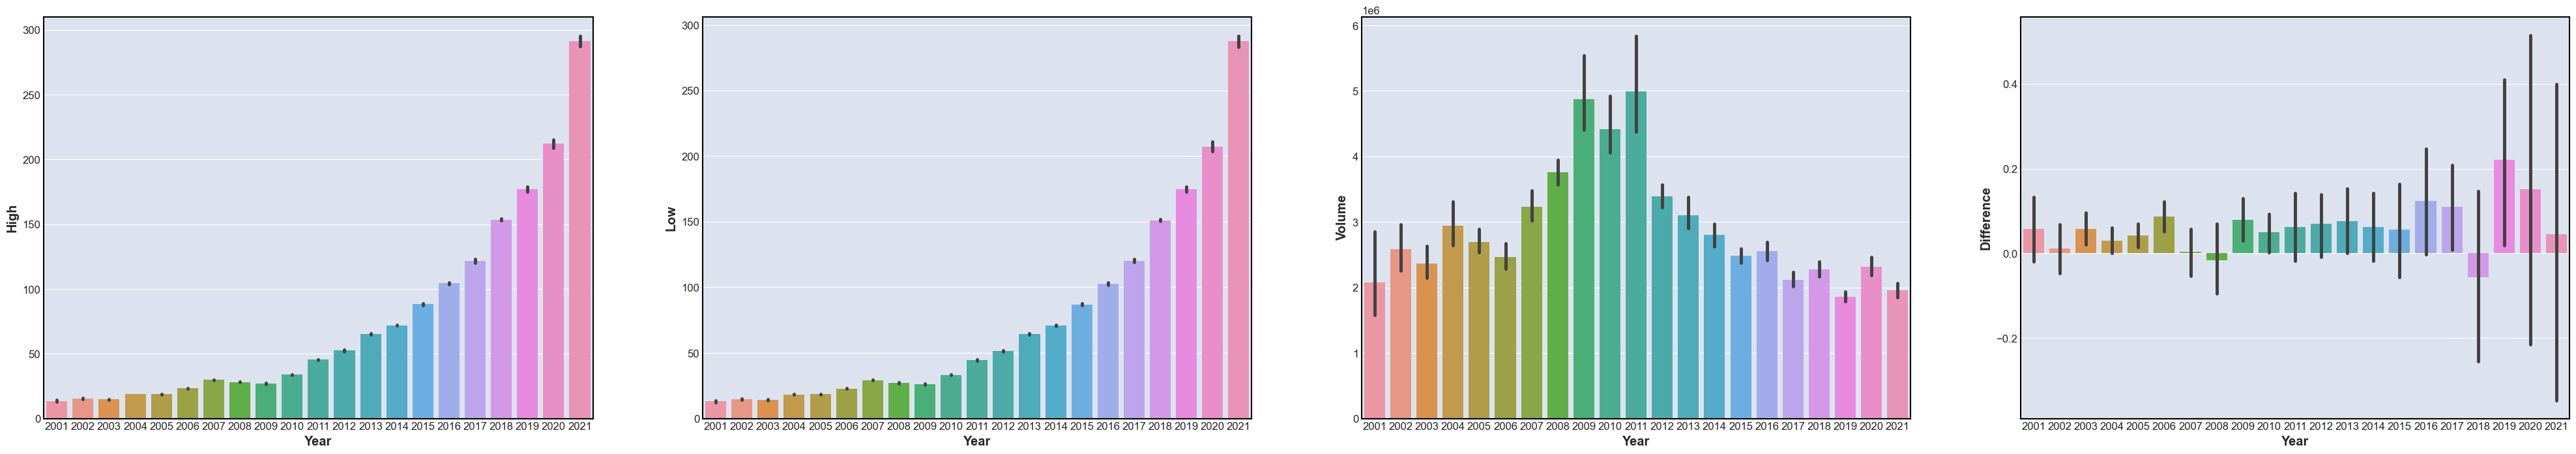

In [ ]:
fig,axes = plt.subplots(1,4, figsize = (50,8))
sns.barplot(data = df2, x = "Year",y = "High", ax = axes[0])
sns.barplot(data = df2, x = "Year", y = "Low", ax = axes[1])
sns.barplot(data = df2, x = "Year",y = "Volume", ax = axes[2])
sns.barplot(data = df2, x = "Year", y = "Difference", ax = axes[3])

<AxesSubplot:xlabel='Month', ylabel='Difference'>

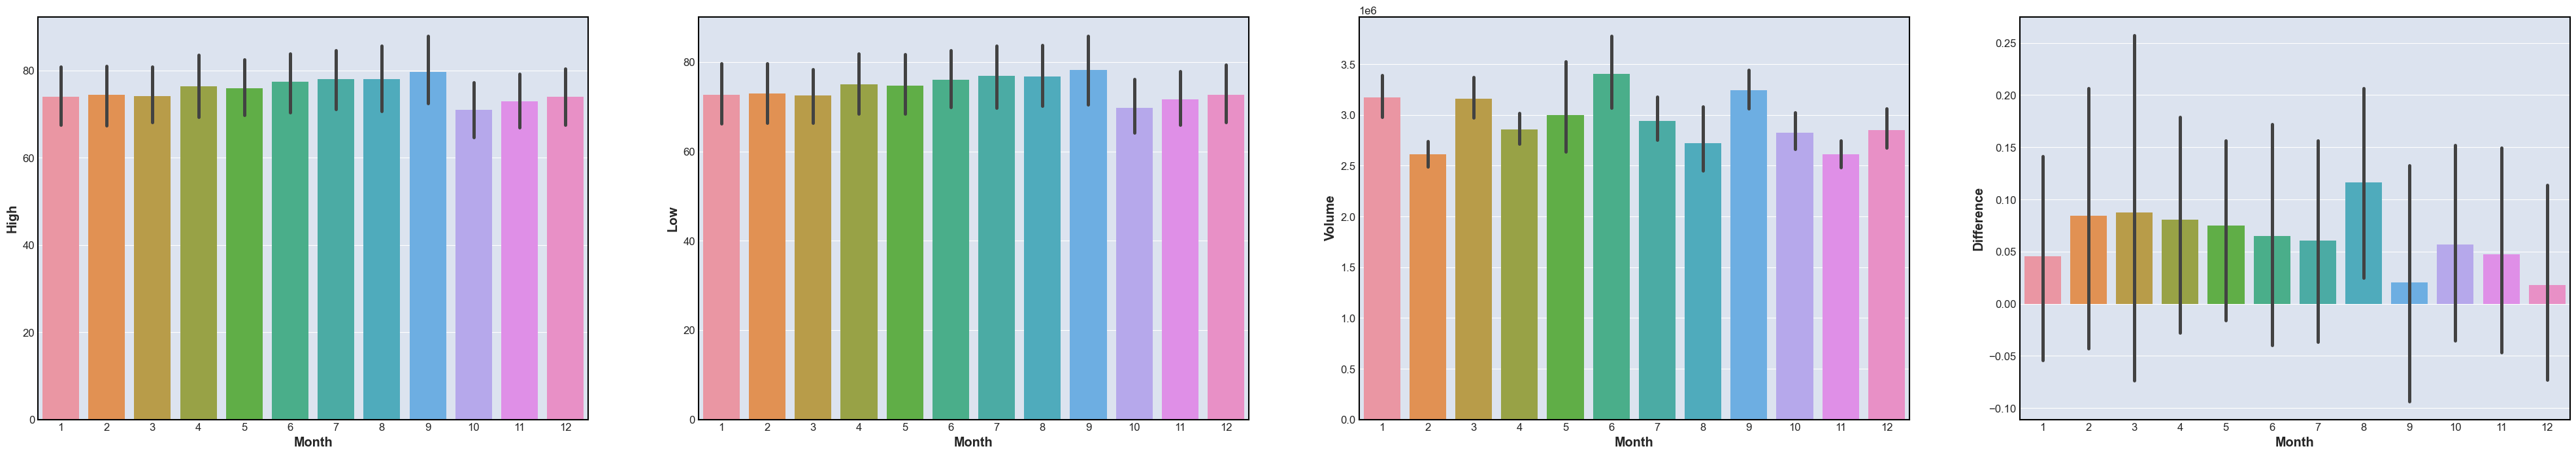

In [ ]:
fig,axes = plt.subplots(1,4, figsize = (50,8))
sns.barplot(data = df2, x = "Month",y = "High", ax = axes[0])
sns.barplot(data = df2, x = "Month", y = "Low", ax = axes[1])
sns.barplot(data = df2, x = "Month",y = "Volume", ax = axes[2])
sns.barplot(data = df2, x = "Month", y = "Difference", ax = axes[3])

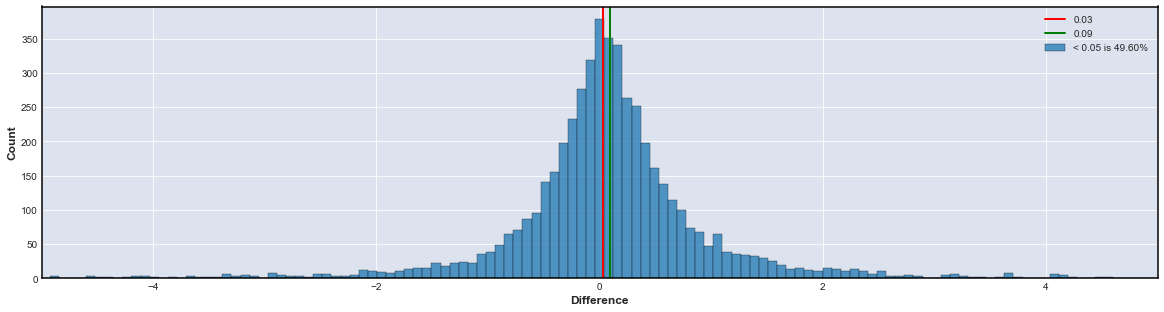

In [ ]:
differ = df2["Difference"].to_list()
total_population = len(differ)
n_dist = (0.05 - mean_differ) / std_differ
z_test = (n_dist, 0.49601)
mean_differ = np.mean(differ)
std_differ = stats.stdev(differ)
conf_interval = (np.round(mean_differ - 1.96*(std_differ/np.sqrt(len(differ))),2),
                 np.round(mean_differ + 1.96*(std_differ/np.sqrt(len(differ))),2))
fig, axes = plt.subplots(1,1, figsize = (20,5))
ax1 = sns.histplot(data = df2, x = "Difference")
ax1.set_xlim([-5, 5])
ax1.axvline(conf_interval[0], color = "red")
ax1.axvline(conf_interval[1], color = "green")
ax1.legend([conf_interval[0], conf_interval[1], "< 0.05 is 49.60%"])

Text(0.5, 1.0, 'Percentage of Price tomorrow is larger ')

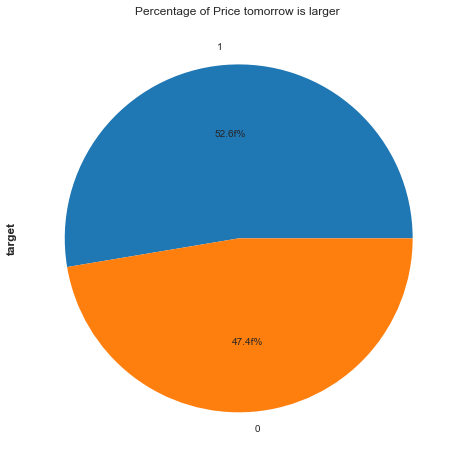

In [ ]:
df2["target"].value_counts().plot(kind = "pie", autopct = "%1.1ff%%", figsize = (20,8))
plt.title("Percentage of Price tomorrow is larger ")

In [ ]:
mean_percentage = 0.5267
conf_interval_perc = (mean_percentage - 1.96 * np.sqrt(mean_percentage * (1 - mean_percentage) / total_population), mean_percentage + 1.96 * np.sqrt(mean_percentage * (1 - mean_percentage) / total_population))
conf_interval_perc

(0.5129725885032099, 0.54042741149679)

In [85]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 500, min_samples_split=250, random_state = 1)

independent_variables = ["Open", "High", "Low", "Close", "Volume", "Tomorrow"]
train_data = df2.iloc[:-100].copy()
test_data = df2.iloc[-100:].copy()

X_train, y_train = train_data[independent_variables], train_data["target"]
X_test, y_test = test_data[independent_variables], test_data["target"]

model.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=250, n_estimators=500, random_state=1)

In [12]:
from sklearn.metrics import precision_score, classification_report
y_preds = model.predict(X_test)
print(classification_report(y_test, y_preds), precision_score(y_test ,y_preds))

              precision    recall  f1-score   support

           0       0.41      0.67      0.50        42
           1       0.55      0.29      0.38        58

    accuracy                           0.45       100
   macro avg       0.48      0.48      0.44       100
weighted avg       0.49      0.45      0.43       100
 0.5483870967741935


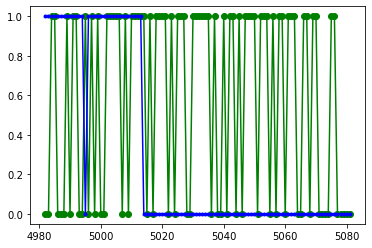

In [ ]:
True_Preds = pd.DataFrame({
    "y_test": y_test,
    "y_preds": y_preds
})
plt.plot(True_Preds["y_test"], marker = "o", color = "green")
plt.plot(True_Preds["y_preds"], marker = ".", color = "blue")

0.45


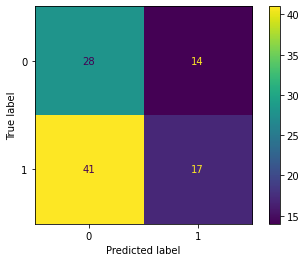

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)
print(accuracy_score(y_test, y_preds))

Text(0, 0.5, 'Probability')

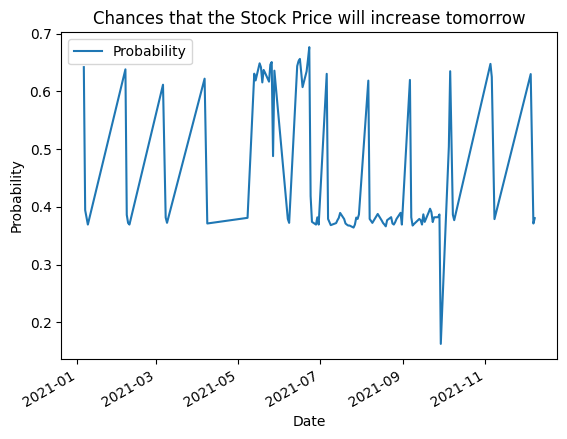

In [33]:
y2_preds_proba = model.predict_proba(X_test)[:,1]
chances = pd.DataFrame({
    "Date": test_data['Date'],
    "Probability": y2_preds_proba
})
chances.set_index("Date").plot()
plt.title('Chances that the Stock Price will increase tomorrow')
plt.ylabel("Probability")

In [ ]:
def predict(X_train,y_train,X_test,y_test,predictors, model):
    model.fit(X_train[predictors], y_train)
    y_preds = model.predict(X_test[predictors])
    combined = pd.DataFrame({
        "y_test": y_test,
        "y_preds":y_preds
    })
    return combined
def backtest(data, start = 2500, step = 250):
    all_predictions = []
    for i in range(start, df2.shape[0], step):
        train = data.iloc[:i].copy()
        test = data.iloc[i:(i+step)]
        predictions = predict(train[independent_variables], train["target"], test[independent_variables], test["target"], independent_variables, model)
        all_predictions.append(predictions)
    all_y_test = []
    all_y_preds = []
    for i in all_predictions:
        for cols, row in i.items():
            if cols == "y_test":
                for j in row.to_list():
                    all_y_test.append(j)
            elif cols == "y_preds":
                    for k in row.to_list():
                        all_y_preds.append(k)
    return all_y_test, all_y_preds

y_test, y_preds = backtest(df2)


In [ ]:
precision_score(y_test, y_preds)

0.5831739961759083

In [ ]:
print(classification_report(all_y_test, all_y_preds))

              precision    recall  f1-score   support

           0       0.48      0.63      0.54      1169
           1       0.58      0.43      0.50      1413

    accuracy                           0.52      2582
   macro avg       0.53      0.53      0.52      2582
weighted avg       0.54      0.52      0.52      2582



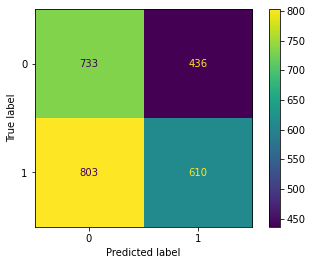

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

In [63]:
#Using tensorflow to predict wheter the stock price will go increas tomorrow

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = "relu", input_dim = len(X_train.columns), ),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = tf.keras.losses.BinaryCrossentropy(), metrics = ["accuracy"])
r = model.fit(X_train, y_train, epochs =1000, batch_size = 32)

Epoch 1/1000
156/156 [==============================] - 2s 2ms/step - loss: 45432.3047 - accuracy: 0.5100
Epoch 2/1000
156/156 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5213
Epoch 3/1000
156/156 [==============================] - 1s 3ms/step - loss: 0.6935 - accuracy: 0.5145
Epoch 4/1000
156/156 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5181
Epoch 5/1000
156/156 [==============================] - 1s 3ms/step - loss: 0.6936 - accuracy: 0.5181
Epoch 6/1000
156/156 [==============================] - 1s 3ms/step - loss: 0.6939 - accuracy: 0.5153
Epoch 7/1000
156/156 [==============================] - 1s 3ms/step - loss: 0.6950 - accuracy: 0.5084
Epoch 8/1000
156/156 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.5145
Epoch 9/1000
156/156 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5209
Epoch 10/1000
156/156 [==============================] - 0s 2ms/step - loss: 0

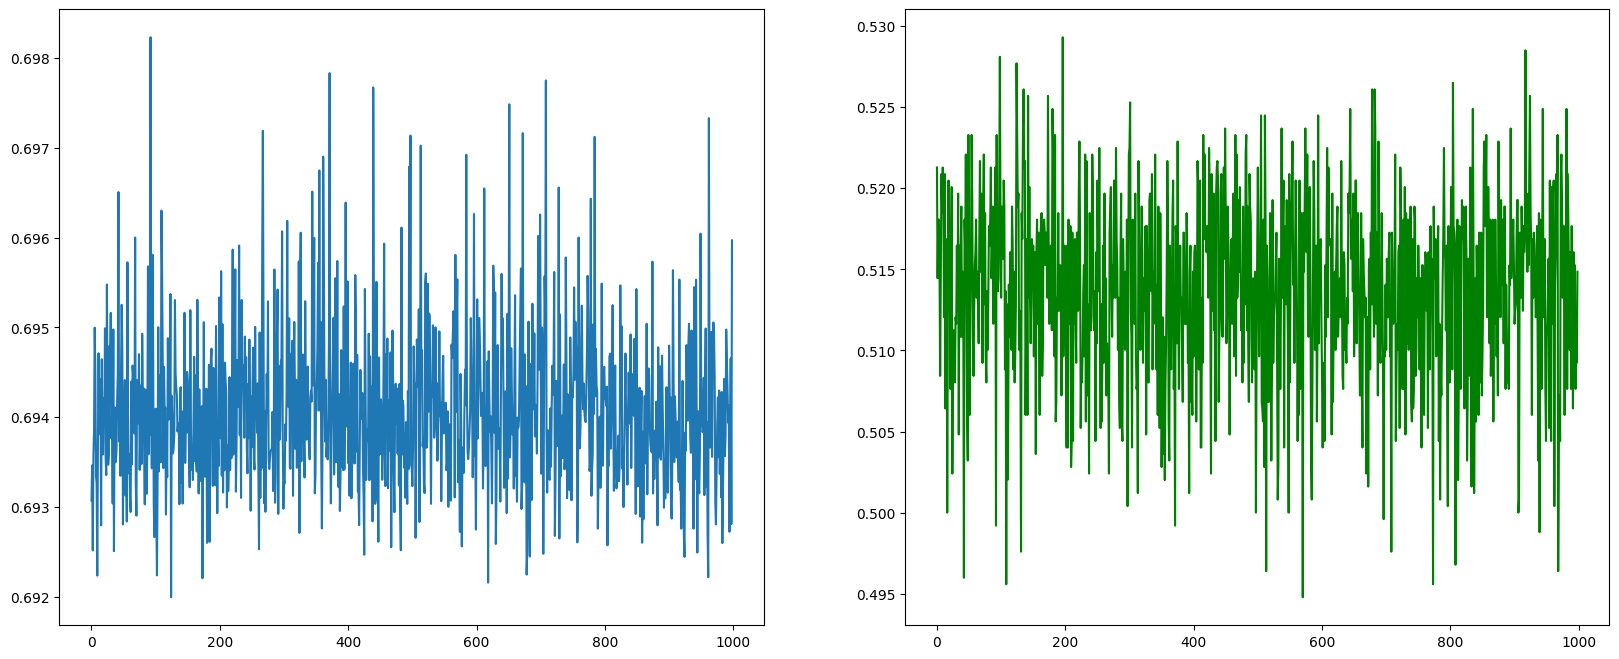

In [65]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.plot(r.history["loss"][1:])
ax2.plot(r.history["accuracy"][1:], color = "green")

In [80]:
# y_preds3 = model.predict(X_test)
y_preds3 = [1 if i > .5 else 0 for i in y_preds]
from sklearn.metrics import classification_report, precision_score, ConfusionMatrixDisplay
print(classification_report(y_test, y_preds3))

              precision    recall  f1-score   support

           0       0.41      0.67      0.50        42
           1       0.55      0.29      0.38        58

    accuracy                           0.45       100
   macro avg       0.48      0.48      0.44       100
weighted avg       0.49      0.45      0.43       100



In [78]:
precision_score(y_test, y_preds3)

0.5483870967741935

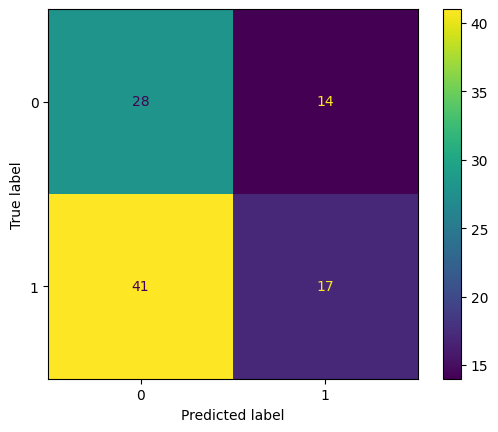

In [83]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds3)

Text(0, 0.5, 'Column')

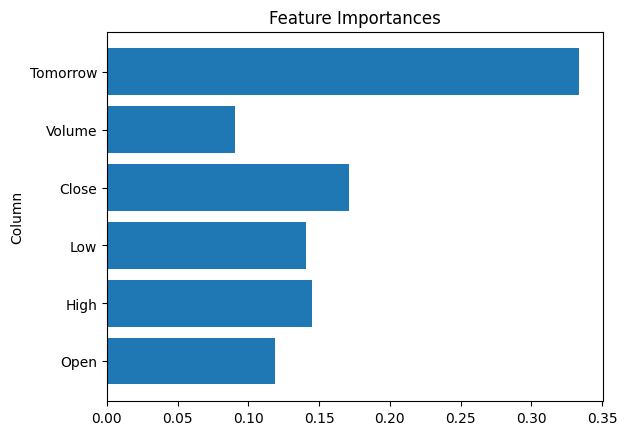

In [91]:
model.feature_importances_
plt.barh(independent_variables, model.feature_importances_)
plt.title("Feature Importances")
plt.ylabel("Column")


## Conclusion

*   The Stock Price of Accenture increases each year. But the Volume doesn't change at all. The highest volume that Accenture sold was approximately in 2009 or 2010.
*   Most investors buy the stocks every June and September. However, most investors don't buy acquisition stock every month of February.
* The stock price of accenture in 2021 is aproximately 280 to 300.

